In [4]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
C:\Users\Rajit_Sanghvi\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [5]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [6]:
seed = 232
np.random.seed(seed)
tf.random.set_seed(seed)

In [87]:
# Preprocessing the training set
train_gen = ImageDataGenerator(rescale = 1./255)
train_ds = train_gen.flow_from_directory('./Data/training',
                                                 target_size = (244, 244),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

# Preprocessing the validation set
val_gen = ImageDataGenerator(rescale = 1./255)
valid_ds = val_gen.flow_from_directory('./Data/validation',
                                            target_size = (244, 244),
                                            batch_size = 32,
                                            class_mode = 'binary')


Found 155 images belonging to 2 classes.
Found 49 images belonging to 2 classes.


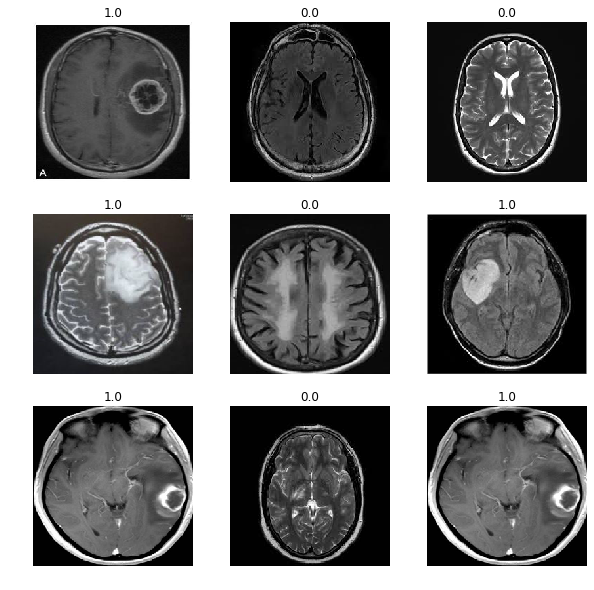

In [297]:
plt.figure(figsize=(10, 10))
images, labels = train_ds.next()
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(labels[i])
    plt.axis("off")

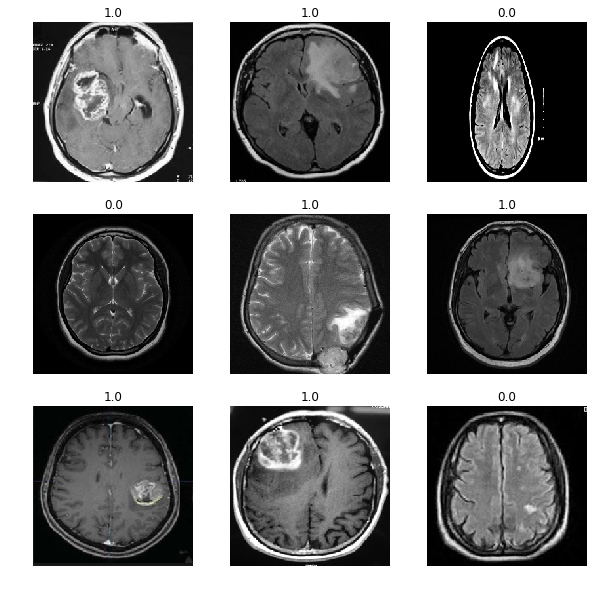

In [298]:
plt.figure(figsize=(10, 10))
images, labels = next(valid_ds)
j=0
for i in range(13, 22):
    j = j + 1
    ax = plt.subplot(3, 3, j)
    plt.imshow(images[i])
    plt.title(labels[i])
    plt.axis("off")

In [299]:
labels

array([1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1.],
      dtype=float32)

In [300]:
train_ds.class_indices

{'no': 0, 'yes': 1}

### Building the CNN Model

In [275]:
def define_smaller_model():

    model = tf.keras.models.Sequential()

    # Convolution
    model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[244, 244, 3]))

    # Pooling
    model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

    # Flattening
    model.add(tf.keras.layers.Flatten())

    # Full Connection
    model.add(tf.keras.layers.Dense(units=128, activation='relu'))

    # Output Layer
    model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

    # Compiling the CNN
    model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

    return model

In [276]:
model = define_model()
model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_69 (Conv2D)           (None, 242, 242, 32)      896       
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 121, 121, 32)      0         
_________________________________________________________________
flatten_22 (Flatten)         (None, 468512)            0         
_________________________________________________________________
dense_64 (Dense)             (None, 128)               59969664  
_________________________________________________________________
dense_65 (Dense)             (None, 1)                 129       
Total params: 59,970,689
Trainable params: 59,970,689
Non-trainable params: 0
_________________________________________________________________


In [277]:
# Training the CNN on the Training set and evaluating it on the validation set
history = model.fit(x = train_ds, validation_data = valid_ds, epochs = 25)

Epoch 1/25
5/5 [==============================] - 6s 1s/step - loss: 12.7169 - accuracy: 0.5290 - val_loss: 2.3818 - val_accuracy: 0.8163
Epoch 2/25
5/5 [==============================] - 4s 894ms/step - loss: 3.9106 - accuracy: 0.6903 - val_loss: 3.2404 - val_accuracy: 0.7755
Epoch 3/25
5/5 [==============================] - 4s 902ms/step - loss: 2.1520 - accuracy: 0.7484 - val_loss: 2.9544 - val_accuracy: 0.6122
Epoch 4/25
5/5 [==============================] - 4s 901ms/step - loss: 0.8058 - accuracy: 0.7935 - val_loss: 1.5817 - val_accuracy: 0.8163
Epoch 5/25
5/5 [==============================] - 5s 912ms/step - loss: 0.6555 - accuracy: 0.8323 - val_loss: 0.8900 - val_accuracy: 0.8571
Epoch 6/25
5/5 [==============================] - 4s 882ms/step - loss: 0.1356 - accuracy: 0.9484 - val_loss: 0.8944 - val_accuracy: 0.6735
Epoch 7/25
5/5 [==============================] - 4s 894ms/step - loss: 0.0626 - accuracy: 0.9871 - val_loss: 0.6713 - val_accuracy: 0.8571
Epoch 8/25
5/5 [======

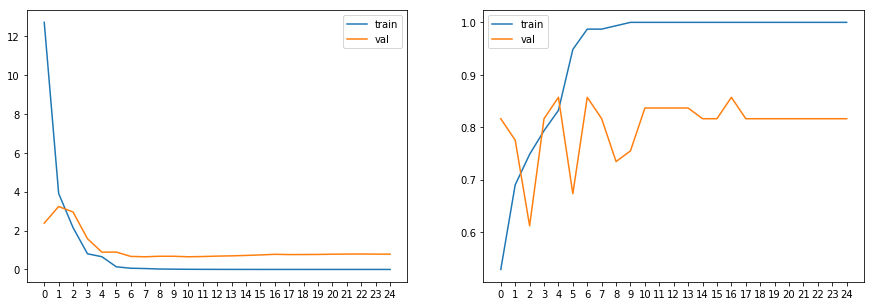

In [278]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xticks(np.arange(25))
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(25))
plt.legend()

(<matplotlib.image.AxesImage at 0x217e80ecd30>, 0.0)

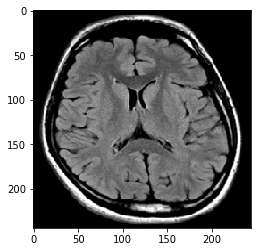

In [97]:
X_train, y_train = next(train_ds)
X_val, y_val = next(valid_ds)
plt.imshow(X_val[0]), y_val[0]

In [98]:
pred = model.predict(valid_ds)
pred[pred > 0.5] = 1
pred[pred < 0.5] = 0
pred[0]

array([1.], dtype=float32)

(-0.5, 243.5, 243.5, -0.5)

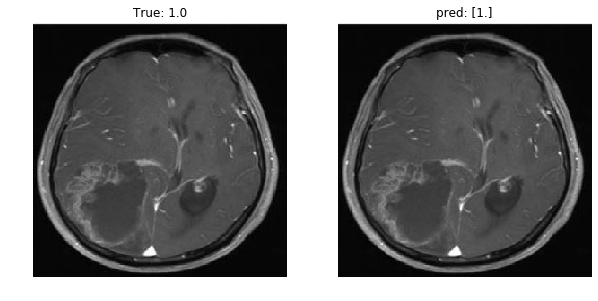

In [99]:
plt.figure(figsize=(10, 10))

ax = plt.subplot(1, 2, 1)
images, labels = next(valid_ds)
plt.imshow(images[0])
plt.title('True: ' + str(labels[0]))
plt.axis("off")

ax = plt.subplot(1, 2, 2)
plt.imshow(images[0])
plt.title('pred: ' + str(pred[0]))
plt.axis("off")

In [310]:
def define_smaller_model(learning_rate):

    model = tf.keras.models.Sequential()

    # Convolution
    model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[244, 244, 3]))

    # Pooling
    model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

    # Flattening
    model.add(tf.keras.layers.Flatten())

    # Full Connection
    model.add(tf.keras.layers.Dense(units=128, activation='relu'))

    # Output Layer
    model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

    # Compiling the CNN
    optimizer = tf.keras.optimizers.Adam(learning_rate)
    model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

    return model

## Tuning Learning rate

In [311]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    model = define_smaller_model(lr)
    history = model.fit(train_ds, epochs=10, validation_data=valid_ds)
    scores[lr] = history.history

    print()
    print()

0.0001
Epoch 1/10
5/5 [==============================] - 6s 989ms/step - loss: 1.2894 - accuracy: 0.5548 - val_loss: 1.2949 - val_accuracy: 0.6939
Epoch 2/10
5/5 [==============================] - 4s 890ms/step - loss: 0.7586 - accuracy: 0.7548 - val_loss: 0.8527 - val_accuracy: 0.6735
Epoch 3/10
5/5 [==============================] - 4s 908ms/step - loss: 0.8792 - accuracy: 0.7806 - val_loss: 0.8815 - val_accuracy: 0.7755
Epoch 4/10
5/5 [==============================] - 4s 884ms/step - loss: 0.4214 - accuracy: 0.8194 - val_loss: 0.6175 - val_accuracy: 0.7755
Epoch 5/10
5/5 [==============================] - 4s 898ms/step - loss: 0.3265 - accuracy: 0.8903 - val_loss: 0.5876 - val_accuracy: 0.7755
Epoch 6/10
5/5 [==============================] - 4s 885ms/step - loss: 0.2262 - accuracy: 0.9032 - val_loss: 0.6116 - val_accuracy: 0.8163
Epoch 7/10
5/5 [==============================] - 4s 920ms/step - loss: 0.2037 - accuracy: 0.9355 - val_loss: 0.6392 - val_accuracy: 0.6939
Epoch 8/10
5/

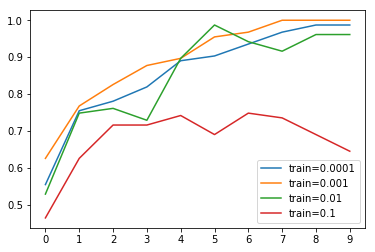

In [312]:
for lr, hist in scores.items():
    plt.plot(hist['accuracy'], label=('train=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

**0.001 is the best learning rate**

# Transfer learning

## Xception Model

In [9]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions
from tensorflow import keras

In [332]:
# Preprocessing the training set
train_gen = ImageDataGenerator(rescale = 1./255)
train_ds = train_gen.flow_from_directory('./Data/training',
                                                 target_size = (150, 150),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

# Preprocessing the validation set
val_gen = ImageDataGenerator(rescale = 1./255)
valid_ds = val_gen.flow_from_directory('./Data/validation',
                                            target_size = (150, 150),
                                            batch_size = 32,
                                            shuffle=False,
                                            class_mode = 'binary')


Found 155 images belonging to 2 classes.
Found 49 images belonging to 2 classes.


In [347]:
def make_model(learning_rate):
    
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(1)(vectors)
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate)
    loss = keras.losses.BinaryCrossentropy()

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [341]:
learning_rate = 0.001

model = make_model(learning_rate)

history = model.fit(
    train_ds,
    epochs=25,
    validation_data=valid_ds
)

Epoch 1/25
5/5 [==============================] - 10s 2s/step - loss: 3.0705 - accuracy: 0.6258 - val_loss: 4.2837 - val_accuracy: 0.6327
Epoch 2/25
5/5 [==============================] - 6s 1s/step - loss: 3.3352 - accuracy: 0.6645 - val_loss: 2.2613 - val_accuracy: 0.7143
Epoch 3/25
5/5 [==============================] - 6s 1s/step - loss: 1.8745 - accuracy: 0.7548 - val_loss: 2.0573 - val_accuracy: 0.8163
Epoch 4/25
5/5 [==============================] - 6s 1s/step - loss: 2.0890 - accuracy: 0.6645 - val_loss: 2.2489 - val_accuracy: 0.6939
Epoch 5/25
5/5 [==============================] - 6s 1s/step - loss: 2.9345 - accuracy: 0.5871 - val_loss: 2.1163 - val_accuracy: 0.7755
Epoch 6/25
5/5 [==============================] - 6s 1s/step - loss: 1.7730 - accuracy: 0.6968 - val_loss: 1.4345 - val_accuracy: 0.8571
Epoch 7/25
5/5 [==============================] - 6s 1s/step - loss: 1.1356 - accuracy: 0.7742 - val_loss: 1.4122 - val_accuracy: 0.8367
Epoch 8/25
5/5 [========================

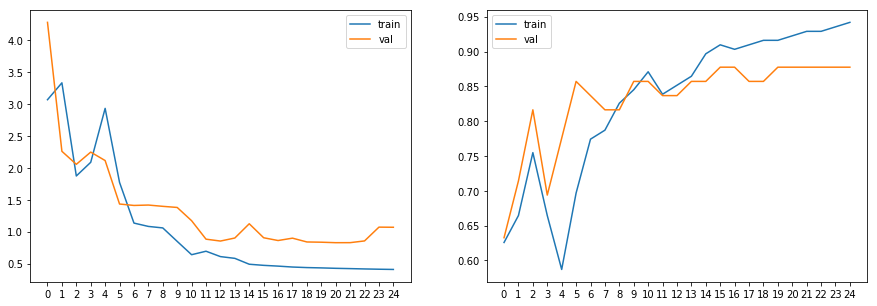

In [342]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xticks(np.arange(25))
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(50))
plt.legend()

### Checkpointing

In [350]:
chechpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

learning_rate = 0.001

model = make_model(learning_rate)

history = model.fit(
    train_ds,
    epochs=25,
    validation_data=valid_ds,
    callbacks=[chechpoint]
)

Epoch 1/25
5/5 [==============================] - 14s 2s/step - loss: 3.7354 - accuracy: 0.5290 - val_loss: 2.1768 - val_accuracy: 0.6735


C:\Users\Rajit_Sanghvi\Anaconda3\lib\site-packages\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/25
5/5 [==============================] - 6s 1s/step - loss: 1.3376 - accuracy: 0.7161 - val_loss: 1.0369 - val_accuracy: 0.7755
Epoch 3/25
5/5 [==============================] - 6s 1s/step - loss: 1.0943 - accuracy: 0.7484 - val_loss: 1.3189 - val_accuracy: 0.7551
Epoch 4/25
5/5 [==============================] - 6s 1s/step - loss: 0.9025 - accuracy: 0.7742 - val_loss: 0.6450 - val_accuracy: 0.7959
Epoch 5/25
5/5 [==============================] - 6s 1s/step - loss: 0.7533 - accuracy: 0.8452 - val_loss: 0.6210 - val_accuracy: 0.8163
Epoch 6/25
5/5 [==============================] - 6s 1s/step - loss: 0.6910 - accuracy: 0.8839 - val_loss: 1.1835 - val_accuracy: 0.7959
Epoch 7/25
5/5 [==============================] - 7s 1s/step - loss: 0.6791 - accuracy: 0.8968 - val_loss: 1.1358 - val_accuracy: 0.8571
Epoch 8/25
5/5 [==============================] - 6s 1s/step - loss: 0.6270 - accuracy: 0.9226 - val_loss: 0.6466 - val_accuracy: 0.8571
Epoch 9/25
5/5 [=========================

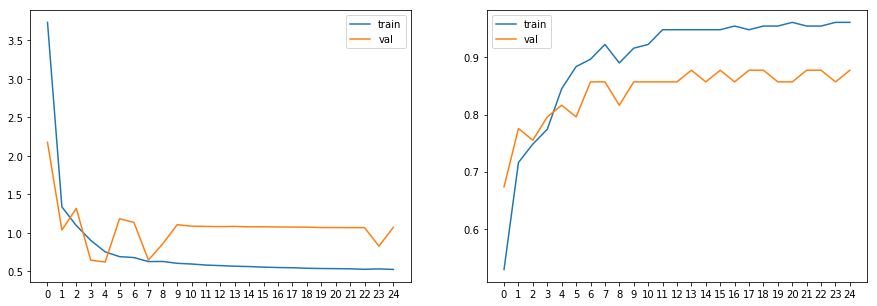

In [352]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xticks(np.arange(25))
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(25))
plt.legend()

## Tuning model parameters - Adding more layers

In [356]:
def make_model(learning_rate):
    
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    inner = keras.layers.Dense(10, activation='relu')(vectors)
    outputs = keras.layers.Dense(1)(inner)
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate)
    loss = keras.losses.BinaryCrossentropy()

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [357]:
chechpoint = keras.callbacks.ModelCheckpoint(
    'xception_v2_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

learning_rate = 0.001

model = make_model(learning_rate)

history = model.fit(
    train_ds,
    epochs=50,
    validation_data=valid_ds,
    callbacks=[chechpoint]
)

Epoch 1/50
5/5 [==============================] - 11s 1s/step - loss: 3.2383 - accuracy: 0.5226 - val_loss: 4.5888 - val_accuracy: 0.6122


C:\Users\Rajit_Sanghvi\Anaconda3\lib\site-packages\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/50
5/5 [==============================] - 6s 1s/step - loss: 3.3479 - accuracy: 0.6129 - val_loss: 2.3373 - val_accuracy: 0.6531
Epoch 3/50
5/5 [==============================] - 6s 1s/step - loss: 0.7727 - accuracy: 0.6710 - val_loss: 0.9408 - val_accuracy: 0.6939
Epoch 4/50
5/5 [==============================] - 6s 1s/step - loss: 0.7576 - accuracy: 0.6968 - val_loss: 0.8098 - val_accuracy: 0.7347
Epoch 5/50
5/5 [==============================] - 6s 1s/step - loss: 0.6096 - accuracy: 0.7613 - val_loss: 1.0083 - val_accuracy: 0.7755
Epoch 6/50
5/5 [==============================] - 7s 1s/step - loss: 0.5077 - accuracy: 0.8258 - val_loss: 1.5380 - val_accuracy: 0.7959
Epoch 7/50
5/5 [==============================] - 7s 1s/step - loss: 0.4692 - accuracy: 0.8645 - val_loss: 1.5177 - val_accuracy: 0.7959
Epoch 8/50
5/5 [==============================] - 8s 2s/step - loss: 0.4443 - accuracy: 0.8710 - val_loss: 1.5006 - val_accuracy: 0.7959
Epoch 9/50
5/5 [=========================

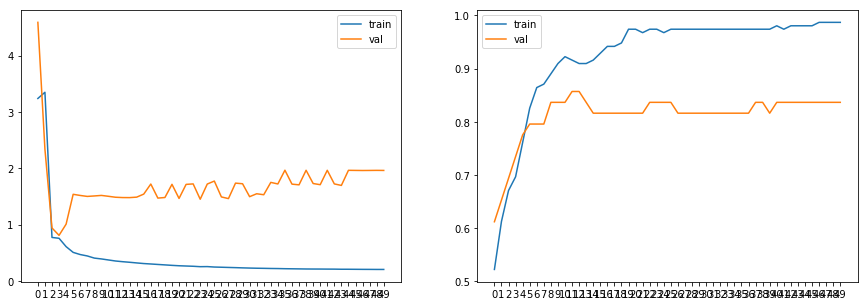

In [358]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xticks(np.arange(50))
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(50))
plt.legend()

**Adding more layers doesn't really help, incontrast the validation loss starts increasing after certain iterations.**

### Parameter Tuning - Varing the number of neurons

In [359]:
def make_model(learning_rate, inner):
    
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    inner = keras.layers.Dense(inner, activation='relu')(vectors)
    outputs = keras.layers.Dense(1)(inner)
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate)
    loss = keras.losses.BinaryCrossentropy()

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [361]:
scores = {}

for size in [10, 100]:
    print(size)

    model = make_model(0.001, size)
    history = model.fit(train_ds, epochs=50, validation_data=valid_ds)
    scores[size] = history.history

    print()
    print()

10
Epoch 1/50
5/5 [==============================] - 11s 2s/step - loss: 3.0014 - accuracy: 0.6065 - val_loss: 2.9401 - val_accuracy: 0.6122
Epoch 2/50
5/5 [==============================] - 6s 1s/step - loss: 1.8047 - accuracy: 0.6839 - val_loss: 1.4659 - val_accuracy: 0.5918
Epoch 3/50
5/5 [==============================] - 6s 1s/step - loss: 1.6314 - accuracy: 0.7548 - val_loss: 1.4772 - val_accuracy: 0.6735
Epoch 4/50
5/5 [==============================] - 6s 1s/step - loss: 1.1162 - accuracy: 0.7484 - val_loss: 1.0906 - val_accuracy: 0.7551
Epoch 5/50
5/5 [==============================] - 6s 1s/step - loss: 1.1723 - accuracy: 0.6581 - val_loss: 1.8117 - val_accuracy: 0.6531
Epoch 6/50
5/5 [==============================] - 6s 1s/step - loss: 2.0118 - accuracy: 0.6000 - val_loss: 1.1113 - val_accuracy: 0.6939
Epoch 7/50
5/5 [==============================] - 6s 1s/step - loss: 1.0392 - accuracy: 0.7677 - val_loss: 1.4761 - val_accuracy: 0.8163
Epoch 8/50
5/5 [=====================

5/5 [==============================] - 6s 1s/step - loss: 5.9029 - accuracy: 0.6129 - val_loss: 5.9130 - val_accuracy: 0.6122
Epoch 11/50
5/5 [==============================] - 6s 1s/step - loss: 5.9029 - accuracy: 0.6129 - val_loss: 5.9130 - val_accuracy: 0.6122
Epoch 12/50
5/5 [==============================] - 6s 1s/step - loss: 5.9029 - accuracy: 0.6129 - val_loss: 5.9130 - val_accuracy: 0.6122
Epoch 13/50
5/5 [==============================] - 6s 1s/step - loss: 5.9029 - accuracy: 0.6129 - val_loss: 5.9130 - val_accuracy: 0.6122
Epoch 14/50
5/5 [==============================] - 6s 1s/step - loss: 5.9029 - accuracy: 0.6129 - val_loss: 5.9130 - val_accuracy: 0.6122
Epoch 15/50
5/5 [==============================] - 6s 1s/step - loss: 5.9029 - accuracy: 0.6129 - val_loss: 5.9130 - val_accuracy: 0.6122
Epoch 16/50
5/5 [==============================] - 6s 1s/step - loss: 5.9029 - accuracy: 0.6129 - val_loss: 5.9130 - val_accuracy: 0.6122
Epoch 17/50
5/5 [=============================

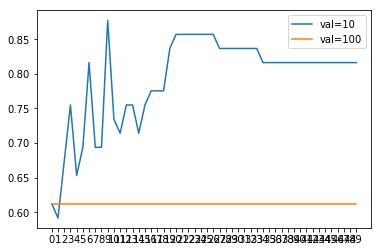

In [362]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))

plt.xticks(np.arange(50))
plt.legend()

**Adding more layers and changing the number of neurons doesn't help much**

# VGG-16

In [75]:
from tensorflow.keras.applications.vgg16 import VGG16

In [170]:
base_VGG16 = VGG16(
        weights='imagenet',
        include_top=False, 
        input_shape=(244, 244, 3)
    )

base_VGG16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_23 (InputLayer)        [(None, 244, 244, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 244, 244, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 244, 244, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 122, 122, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 122, 122, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 122, 122, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 61, 61, 128)       0     

In [369]:
def VGG(learning_rate):
    
    base_model = VGG16(
        weights='imagenet',
        include_top=False, 
        input_shape=(150, 150, 3)
    )
    
    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(1)(vectors)
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate)
    loss = keras.losses.BinaryCrossentropy()

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [370]:
model = VGG(learning_rate)
model.summary()

58900480/58889256 [==============================] - 9s 0us/step
Model: "model_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_37 (InputLayer)        [(None, 150, 150, 3)]     0         
_________________________________________________________________
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_17  (None, 512)               0         
_________________________________________________________________
dense_145 (Dense)            (None, 1)                 513       
Total params: 14,715,201
Trainable params: 513
Non-trainable params: 14,714,688
_________________________________________________________________


In [375]:
chechpoint = keras.callbacks.ModelCheckpoint(
    'VGG16_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

learning_rate = 0.001

model = VGG(learning_rate)

history = model.fit(
    train_ds,
    epochs=50,
    validation_data=valid_ds,
    callbacks=[chechpoint]
)

Epoch 1/50
5/5 [==============================] - 13s 3s/step - loss: 3.8756 - accuracy: 0.3935 - val_loss: 1.0276 - val_accuracy: 0.3673
Epoch 2/50
5/5 [==============================] - 12s 3s/step - loss: 0.7767 - accuracy: 0.5032 - val_loss: 1.0848 - val_accuracy: 0.5306
Epoch 3/50
5/5 [==============================] - 13s 3s/step - loss: 0.7947 - accuracy: 0.5935 - val_loss: 1.3547 - val_accuracy: 0.6122
Epoch 4/50
5/5 [==============================] - 13s 3s/step - loss: 0.9817 - accuracy: 0.6194 - val_loss: 1.5788 - val_accuracy: 0.6122
Epoch 5/50
5/5 [==============================] - 13s 3s/step - loss: 0.8908 - accuracy: 0.6194 - val_loss: 1.2726 - val_accuracy: 0.5918
Epoch 6/50
5/5 [==============================] - 14s 3s/step - loss: 0.7373 - accuracy: 0.5935 - val_loss: 0.9764 - val_accuracy: 0.4898
Epoch 7/50
5/5 [==============================] - 14s 3s/step - loss: 0.6476 - accuracy: 0.6258 - val_loss: 0.7372 - val_accuracy: 0.5510
Epoch 8/50
5/5 [==================

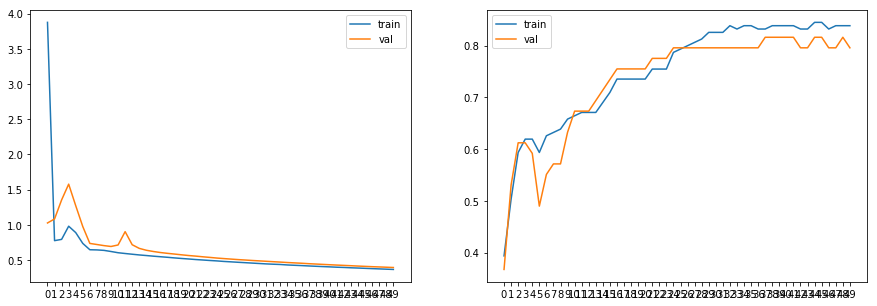

In [376]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xticks(np.arange(50))
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(50))
plt.legend()

### Model Tuning - Data Augmentation

In [377]:
# Preprocessing the training set
train_gen = ImageDataGenerator(rescale = 1./255, 
                                rotation_range=15,
                                width_shift_range=0.1,
                                height_shift_range=0.1,
                                shear_range=0.1,
                                brightness_range=[0.5, 1.5],
                                horizontal_flip=True,
                                vertical_flip=True,)

aug_train_ds = train_gen.flow_from_directory('./Data/training',
                                                 target_size = (150, 150),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

# Preprocessing the validation set
val_gen = ImageDataGenerator(rescale = 1./255)
valid_ds = val_gen.flow_from_directory('./Data/validation',
                                            target_size = (150, 150),
                                            batch_size = 32,
                                            class_mode = 'binary')


Found 155 images belonging to 2 classes.
Found 49 images belonging to 2 classes.


### Visualizing the augmented data

In [107]:
aug_gen = ImageDataGenerator(rescale = 1./255, 
                                rotation_range=15,
                                shear_range=0.1,
                                zoom_range=0.1,
                                horizontal_flip=True,
                            )

Text(0.5, 0.98, 'Original Images')

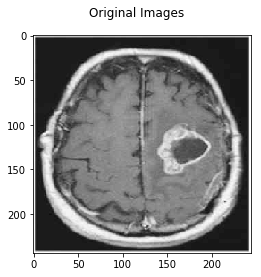

In [132]:
plt.imshow(X_train[0])
plt.suptitle('Original Images')

In [125]:
import os
os.mkdir('augmented_images')

x = X_train[0]  
x = x.reshape((1,) + x.shape) 

i = 0
for batch in aug_gen.flow(x, batch_size=1, save_to_dir='augmented_images', save_prefix='aug_img', save_format='jpg'):
    i += 1
    if i > 20:
        break 

In [130]:
def plot_images(path, title):
    
    from tensorflow.keras.preprocessing.image import load_img
    n = len(os.listdir(path))
        
    j = 10
    i = 10
    plt.figure(figsize=(20, 20))  
    
    for index, filename in enumerate(os.listdir(path)):
        
        fullname = f'{path}/{filename}'
        img = load_img(fullname)
        x = np.array(img)
        
        plt.subplot(i, j, index+1)
        
        plt.imshow(x)

        plt.xticks([])
        plt.yticks([])
                
        plt.suptitle('{}'.format(title))
    plt.show()

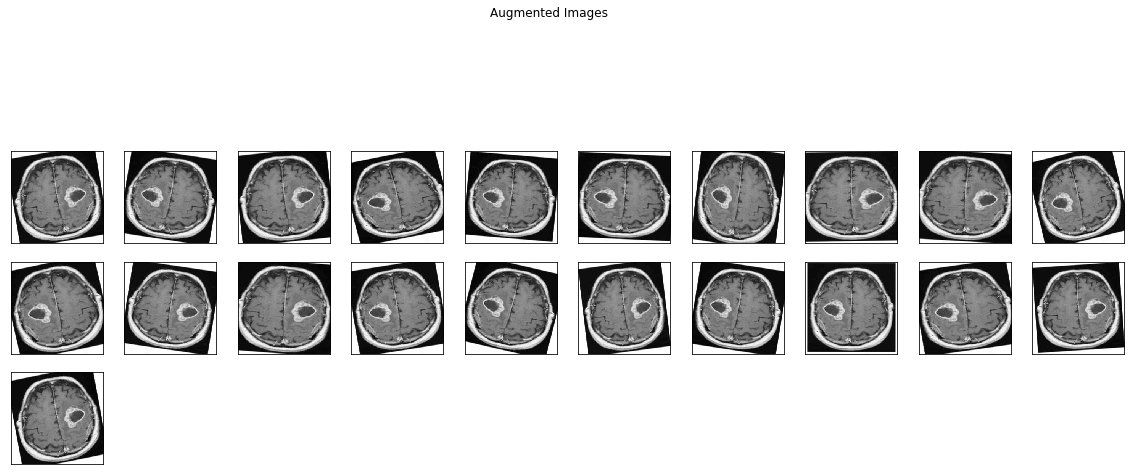

In [131]:
path = './augmented_images'

plot_images(path, "Augmented Images")

In [378]:
chechpoint = keras.callbacks.ModelCheckpoint(
    'VGG16_v2_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

learning_rate = 0.001

model = VGG(learning_rate)

history = model.fit(
    aug_train_ds,
    epochs=50,
    validation_data=valid_ds,
    callbacks=[chechpoint]
)

Epoch 1/50
5/5 [==============================] - 14s 3s/step - loss: 0.6949 - accuracy: 0.6000 - val_loss: 0.6569 - val_accuracy: 0.6327
Epoch 2/50
5/5 [==============================] - 13s 3s/step - loss: 0.9337 - accuracy: 0.6258 - val_loss: 0.6198 - val_accuracy: 0.6531
Epoch 3/50
5/5 [==============================] - 12s 3s/step - loss: 0.8313 - accuracy: 0.6516 - val_loss: 0.6005 - val_accuracy: 0.6122
Epoch 4/50
5/5 [==============================] - 12s 3s/step - loss: 0.6051 - accuracy: 0.6129 - val_loss: 0.5884 - val_accuracy: 0.6327
Epoch 5/50
5/5 [==============================] - 12s 3s/step - loss: 0.5773 - accuracy: 0.7161 - val_loss: 0.5510 - val_accuracy: 0.6531
Epoch 6/50
5/5 [==============================] - 13s 3s/step - loss: 0.5345 - accuracy: 0.7355 - val_loss: 0.5319 - val_accuracy: 0.6327
Epoch 7/50
5/5 [==============================] - 13s 3s/step - loss: 0.5406 - accuracy: 0.7032 - val_loss: 0.5187 - val_accuracy: 0.6531
Epoch 8/50
5/5 [==================

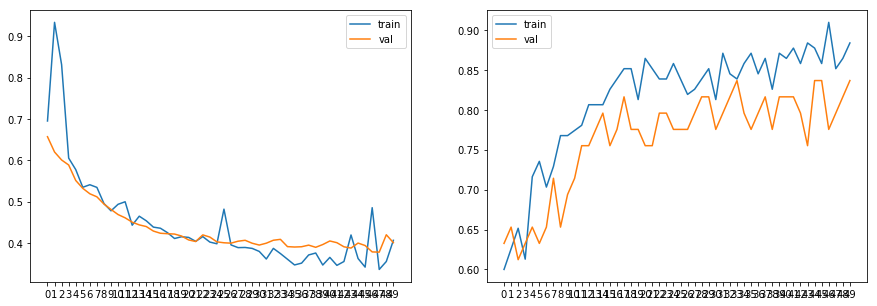

In [379]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xticks(np.arange(50))
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(50))
plt.legend()

In [380]:
# Preprocessing the training set
train_gen = ImageDataGenerator(rescale = 1./255, 
                                rotation_range=15,
                                zoom_range=0.1,
                                shear_range=10,
                                horizontal_flip=True)

aug_train_ds = train_gen.flow_from_directory('./Data/training',
                                                 target_size = (150, 150),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

# Preprocessing the validation set
val_gen = ImageDataGenerator(rescale = 1./255)
valid_ds = val_gen.flow_from_directory('./Data/validation',
                                            target_size = (150, 150),
                                            batch_size = 32,
                                            class_mode = 'binary')


Found 155 images belonging to 2 classes.
Found 49 images belonging to 2 classes.


In [381]:
chechpoint = keras.callbacks.ModelCheckpoint(
    'VGG16_v3_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

learning_rate = 0.001

model = VGG(learning_rate)

history = model.fit(
    aug_train_ds,
    epochs=50,
    validation_data=valid_ds,
    callbacks=[chechpoint]
)

Epoch 1/50
5/5 [==============================] - 18s 3s/step - loss: 0.7596 - accuracy: 0.4774 - val_loss: 0.6605 - val_accuracy: 0.6735
Epoch 2/50
5/5 [==============================] - 15s 3s/step - loss: 0.6916 - accuracy: 0.6129 - val_loss: 0.6453 - val_accuracy: 0.6531
Epoch 3/50
5/5 [==============================] - 16s 3s/step - loss: 0.6620 - accuracy: 0.6129 - val_loss: 0.6361 - val_accuracy: 0.6735
Epoch 4/50
5/5 [==============================] - 16s 3s/step - loss: 0.6537 - accuracy: 0.5871 - val_loss: 0.6116 - val_accuracy: 0.7347
Epoch 5/50
5/5 [==============================] - 16s 3s/step - loss: 0.6496 - accuracy: 0.6129 - val_loss: 0.5904 - val_accuracy: 0.7755
Epoch 6/50
5/5 [==============================] - 15s 3s/step - loss: 0.6155 - accuracy: 0.6516 - val_loss: 0.5733 - val_accuracy: 0.7755
Epoch 7/50
5/5 [==============================] - 15s 3s/step - loss: 0.6054 - accuracy: 0.6581 - val_loss: 0.5671 - val_accuracy: 0.7755
Epoch 8/50
5/5 [==================

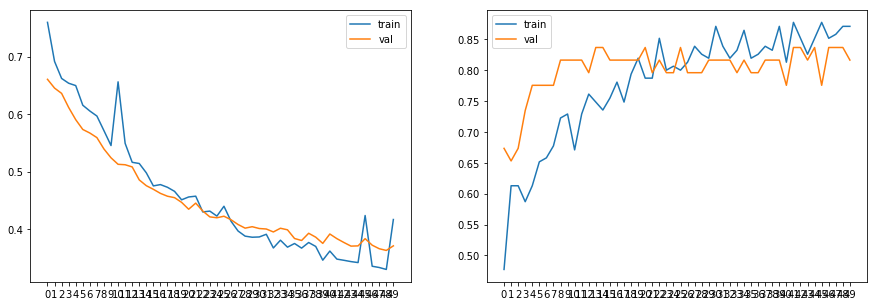

In [382]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xticks(np.arange(50))
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(50))
plt.legend()

### Validation accuracy increased from 81.6% to 83.7% after data augmentation.

## VGG-19

In [69]:
from tensorflow.keras.applications.vgg19 import VGG19

In [74]:
base_VGG19 = VGG19(
        weights='imagenet',
        include_top=False, 
        input_shape=(244, 244, 3)
    )

base_VGG19.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        [(None, 244, 244, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 244, 244, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 244, 244, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 122, 122, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 122, 122, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 122, 122, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 61, 61, 128)       0     

In [70]:
def VGG(learning_rate):
    
    base_model = VGG19(
        weights='imagenet',
        include_top=False, 
        input_shape=(244, 244, 3)
    )
    
    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(244, 244, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(1)(vectors)
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate)
    loss = keras.losses.BinaryCrossentropy()

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [71]:
# Preprocessing the training set
train_gen = ImageDataGenerator(rescale = 1./255, 
                                rotation_range=15,
                                zoom_range=0.1,
                                horizontal_flip=True)

aug_train_ds = train_gen.flow_from_directory('./Data/training',
                                                 target_size = (244, 244),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

# Preprocessing the validation set
val_gen = ImageDataGenerator(rescale = 1./255)
valid_ds = val_gen.flow_from_directory('./Data/validation',
                                            target_size = (244, 244),
                                            batch_size = 32,
                                            class_mode = 'binary')


Found 155 images belonging to 2 classes.
Found 49 images belonging to 2 classes.


In [72]:
chechpoint = keras.callbacks.ModelCheckpoint(
    'VGG19_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

learning_rate = 0.001

model = VGG(learning_rate)

history = model.fit(
    aug_train_ds,
    epochs=50,
    validation_data=valid_ds,
    callbacks=[chechpoint]
)

Epoch 1/50
5/5 [==============================] - 41s 8s/step - loss: 0.7507 - accuracy: 0.5032 - val_loss: 0.7087 - val_accuracy: 0.5510
Epoch 2/50
5/5 [==============================] - 41s 8s/step - loss: 0.7104 - accuracy: 0.4968 - val_loss: 0.6575 - val_accuracy: 0.6531
Epoch 3/50
5/5 [==============================] - 40s 8s/step - loss: 0.6687 - accuracy: 0.5806 - val_loss: 0.6400 - val_accuracy: 0.6327
Epoch 4/50
5/5 [==============================] - 41s 9s/step - loss: 0.6877 - accuracy: 0.6129 - val_loss: 0.6252 - val_accuracy: 0.6735
Epoch 5/50
5/5 [==============================] - 41s 8s/step - loss: 0.6733 - accuracy: 0.6065 - val_loss: 0.6292 - val_accuracy: 0.6327
Epoch 6/50
5/5 [==============================] - 41s 9s/step - loss: 0.6552 - accuracy: 0.5613 - val_loss: 0.6096 - val_accuracy: 0.7755
Epoch 7/50
5/5 [==============================] - 41s 9s/step - loss: 0.6242 - accuracy: 0.6065 - val_loss: 0.5912 - val_accuracy: 0.7551
Epoch 8/50
5/5 [==================

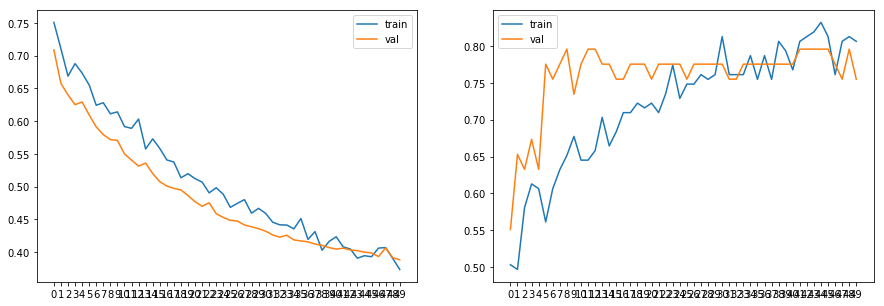

In [73]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xticks(np.arange(50))
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(50))
plt.legend()

## ResNet50

In [78]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [79]:
base_ResNet50 = ResNet50(
        weights='imagenet',
        include_top=False, 
        input_shape=(244, 244, 3)
    )

base_ResNet50.summary()

94781440/94765736 [==============================] - 14s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_20 (InputLayer)           [(None, 244, 244, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 250, 250, 3)  0           input_20[0][0]                   
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 122, 122, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 122, 122, 64) 256         conv1_conv[0][0]                 
_________________________

In [80]:
def resnet50(learning_rate):
    
    base_model = ResNet50(
        weights='imagenet',
        include_top=False, 
        input_shape=(244, 244, 3)
    )
    
    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(244, 244, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(1)(vectors)
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate)
    loss = keras.losses.BinaryCrossentropy()

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [81]:
chechpoint = keras.callbacks.ModelCheckpoint(
    'resnet50_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

learning_rate = 0.001

model = resnet50(learning_rate)

history = model.fit(
    aug_train_ds,
    epochs=50,
    validation_data=valid_ds,
    callbacks=[chechpoint]
)

Epoch 1/50
5/5 [==============================] - 23s 4s/step - loss: 0.9343 - accuracy: 0.4387 - val_loss: 1.1678 - val_accuracy: 0.3878


C:\Users\Rajit_Sanghvi\Anaconda3\lib\site-packages\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/50
5/5 [==============================] - 16s 3s/step - loss: 0.8618 - accuracy: 0.4903 - val_loss: 0.7160 - val_accuracy: 0.6122
Epoch 3/50
5/5 [==============================] - 17s 3s/step - loss: 0.9246 - accuracy: 0.6129 - val_loss: 0.6960 - val_accuracy: 0.6122
Epoch 4/50
5/5 [==============================] - 16s 3s/step - loss: 0.6815 - accuracy: 0.5161 - val_loss: 0.7708 - val_accuracy: 0.3673
Epoch 5/50
5/5 [==============================] - 16s 3s/step - loss: 0.7330 - accuracy: 0.5032 - val_loss: 0.6565 - val_accuracy: 0.6735
Epoch 6/50
5/5 [==============================] - 16s 3s/step - loss: 0.7381 - accuracy: 0.6839 - val_loss: 1.2185 - val_accuracy: 0.6122
Epoch 7/50
5/5 [==============================] - 17s 3s/step - loss: 0.8048 - accuracy: 0.5677 - val_loss: 0.7612 - val_accuracy: 0.3878
Epoch 8/50
5/5 [==============================] - 17s 3s/step - loss: 0.7494 - accuracy: 0.4516 - val_loss: 0.6431 - val_accuracy: 0.6735
Epoch 9/50
5/5 [==================

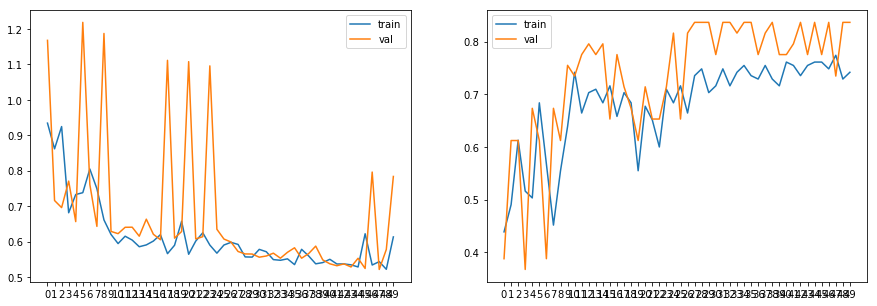

In [82]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xticks(np.arange(50))
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(50))
plt.legend()

### Model Summary

| Models | Training Accuracy | Validation Accuracy |
| --- | --- | --- |
| Xception | 94.19 | 87.8 |
| VGG16 | 87.10 | 83.7 |
| VGG19 | 81.29 | 79.6 |
| ResNet50 | 74.19 | 83.7 |

# Using the model

In [133]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img

from tensorflow.keras.applications.xception import preprocess_input

### Xception

In [134]:
model = keras.models.load_model('xception_v1_14_0.878.h5')

In [152]:
# Preprocessing the validation set
test_gen = ImageDataGenerator(rescale = 1./255)
test = test_gen.flow_from_directory('./Data/test',
                                            target_size = (244, 244),
                                            batch_size = 49,
                                            class_mode = 'binary')

Found 49 images belonging to 2 classes.


In [153]:
# validate on test set
predictions = model.predict(test)
predictions = [1 if x>0.5 else 0 for x in predictions]

(-0.5, 243.5, 243.5, -0.5)

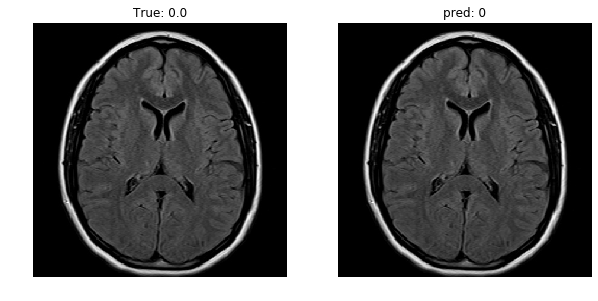

In [158]:
plt.figure(figsize=(10, 10))

ax = plt.subplot(1, 2, 1)
images, labels = next(test)
plt.imshow(images[0])
plt.title('True: ' + str(labels[0]))
plt.axis("off")

ax = plt.subplot(1, 2, 2)
plt.imshow(images[0])
plt.title('pred: ' + str(predictions[0]))
plt.axis("off")

In [151]:
# validate on test set
from sklearn.metrics import accuracy_score, confusion_matrix

images, labels = next(test)

predictions = model.predict(test)
predictions = [1 if x>0.5 else 0 for x in predictions]

acc = accuracy_score(labels, np.round(predictions))*100
cm = confusion_matrix(labels, np.round(predictions))
tn, fp, fn, tp = cm.ravel()

print('CONFUSION MATRIX ------------------')
print(cm)

print('\nTEST METRICS ----------------------')
precision = tp/(tp+fp)*100
recall = tp/(tp+fn)*100
print('Accuracy: {}%'.format(acc))
print('Precision: {}%'.format(precision))
print('Recall: {}%'.format(recall))
print('F1-score: {}'.format(2*precision*recall/(precision+recall)))

CONFUSION MATRIX ------------------
[[ 8 11]
 [ 1 29]]

TEST METRICS ----------------------
Accuracy: 75.51020408163265%
Precision: 72.5%
Recall: 96.66666666666667%
F1-score: 82.85714285714286


In [169]:
model.evaluate(test)

1/1 [==============================] - 4s 4s/step - loss: 0.7221 - accuracy: 0.7551


[0.7221421003341675, 0.7551020383834839]

### VGG16

In [159]:
VGG16_model = keras.models.load_model('VGG16_v3_14_0.837.h5')

In [160]:
# validate on test set
from sklearn.metrics import accuracy_score, confusion_matrix

images, labels = next(test)

predictions = VGG16_model.predict(test)
predictions = [1 if x>0.5 else 0 for x in predictions]

acc = accuracy_score(labels, np.round(predictions))*100
cm = confusion_matrix(labels, np.round(predictions))
tn, fp, fn, tp = cm.ravel()

print('CONFUSION MATRIX ------------------')
print(cm)

print('\nTEST METRICS ----------------------')
precision = tp/(tp+fp)*100
recall = tp/(tp+fn)*100
print('Accuracy: {}%'.format(acc))
print('Precision: {}%'.format(precision))
print('Recall: {}%'.format(recall))
print('F1-score: {}'.format(2*precision*recall/(precision+recall)))

CONFUSION MATRIX ------------------
[[15  4]
 [ 6 24]]

TEST METRICS ----------------------
Accuracy: 79.59183673469387%
Precision: 85.71428571428571%
Recall: 80.0%
F1-score: 82.75862068965516


In [168]:
VGG16_model.evaluate(test)

1/1 [==============================] - 8s 8s/step - loss: 0.5631 - accuracy: 0.7959


[0.5630559921264648, 0.795918345451355]

### VGG19

In [161]:
VGG19_model = keras.models.load_model('VGG19_v1_09_0.796.h5')

In [162]:
# validate on test set
from sklearn.metrics import accuracy_score, confusion_matrix

images, labels = next(test)

predictions = VGG19_model.predict(test)
predictions = [1 if x>0.5 else 0 for x in predictions]

acc = accuracy_score(labels, np.round(predictions))*100
cm = confusion_matrix(labels, np.round(predictions))
tn, fp, fn, tp = cm.ravel()

print('CONFUSION MATRIX ------------------')
print(cm)

print('\nTEST METRICS ----------------------')
precision = tp/(tp+fp)*100
recall = tp/(tp+fn)*100
print('Accuracy: {}%'.format(acc))
print('Precision: {}%'.format(precision))
print('Recall: {}%'.format(recall))
print('F1-score: {}'.format(2*precision*recall/(precision+recall)))

CONFUSION MATRIX ------------------
[[ 9 10]
 [ 5 25]]

TEST METRICS ----------------------
Accuracy: 69.38775510204081%
Precision: 71.42857142857143%
Recall: 83.33333333333334%
F1-score: 76.92307692307693


In [167]:
VGG19_model.evaluate(test)

1/1 [==============================] - 10s 10s/step - loss: 0.5932 - accuracy: 0.6939


[0.5931839942932129, 0.6938775777816772]

### ResNet50

In [163]:
ResNet50_model = keras.models.load_model('resnet50_v1_28_0.837.h5')

In [164]:
# validate on test set
from sklearn.metrics import accuracy_score, confusion_matrix

images, labels = next(test)

predictions = ResNet50_model.predict(test)
predictions = [1 if x>0.5 else 0 for x in predictions]

acc = accuracy_score(labels, np.round(predictions))*100
cm = confusion_matrix(labels, np.round(predictions))
tn, fp, fn, tp = cm.ravel()

print('CONFUSION MATRIX ------------------')
print(cm)

print('\nTEST METRICS ----------------------')
precision = tp/(tp+fp)*100
recall = tp/(tp+fn)*100
print('Accuracy: {}%'.format(acc))
print('Precision: {}%'.format(precision))
print('Recall: {}%'.format(recall))
print('F1-score: {}'.format(2*precision*recall/(precision+recall)))

CONFUSION MATRIX ------------------
[[14  5]
 [ 6 24]]

TEST METRICS ----------------------
Accuracy: 77.55102040816327%
Precision: 82.75862068965517%
Recall: 80.0%
F1-score: 81.35593220338983


In [166]:
ResNet50_model.evaluate(test)

1/1 [==============================] - 5s 5s/step - loss: 0.5473 - accuracy: 0.7755


[0.547325074672699, 0.7755101919174194]

| Models | Training Accuracy | Validation Accuracy | Testing Accuracy
| --- | --- | --- |
| Xception | 94.19 | 87.8 | 75.51
| **VGG16** | **87.10** | **83.7** | **79.59**
| VGG19 | 81.29 | 79.6 | 69.38
| ResNet50 | 74.19 | 83.7 | 77.55

**We will keep the VGG16 model as our final model**

**End of notebook**